## Members: Evelyn Yoon & Sangwon Lee

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [2]:
# read csv file
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [126]:
# rename the names of the columns like below
df = df.rename(columns={0:"poison", 1:"capshape", 2:"ap-surface", 3:"cap-color", 4:"bruises", 5:"odor", 6:"gill-attachment",
                        7:"gill-spacing", 8:"gillsize", 9:"gill-color", 10:"stalk-shape", 11:"stalk-root", 12:"stalk-surface-above-ring",
                        13:"stalk-surface-below-ring", 14:"stalk-color-above-ring", 15:"stalk-color-below-ring", 16:"veiltype",
                        17:"veil-color", 18:"ringnumber", 19:"ring-type", 20:"spore-print-color", 21:"population", 22:"habitat"})

In [127]:
df.head()

,poison,capshape,ap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gillsize,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veiltype,veil-color,ringnumber,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [128]:
df.shape

(8124, 23)

In [129]:
# create a new dataframe called result
column_list = ["poison", "bruises", "odor", "gillsize", "veiltype", "ringnumber"]
result = pd.DataFrame(data=df, columns=column_list)

Once we create a new dataframe called result, we used total 6 columns including the column that indicates edible or poisonous, the column that includes odor, and 4 other columns (bruises, gillsize, veiltype, ringnumber)

In [130]:
# check the dataframe we created
result.head()

,poison,bruises,odor,gillsize,veiltype,ringnumber
0,p,t,p,n,p,o
1,e,t,a,b,p,o
2,e,t,l,b,p,o
3,p,t,p,n,p,o
4,e,f,n,b,p,o


In [131]:
# Create a set of dummy variables 
result = result.apply(preprocessing.LabelEncoder().fit_transform)

We first need to change all the values in numbers for analyzing. We have created dummy variables by using LabelEncoder. Now, we can see we've sucessfully changed all the values in number like below.

In [132]:
result.head()

,poison,bruises,odor,gillsize,veiltype,ringnumber
0,1,1,6,1,0,1
1,0,1,0,0,0,1
2,0,1,3,0,0,1
3,1,1,6,1,0,1
4,0,0,5,0,0,1


Text(0,0.5,'Frequency')

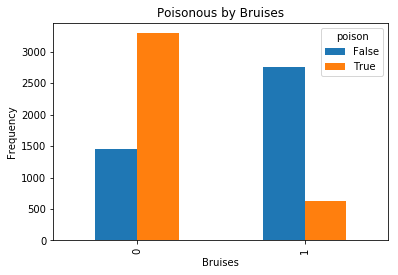

In [133]:
# barplot of poisonous by bruises (True or False)
pd.crosstab(result.bruises, result.poison.astype(bool)).plot(kind='bar')
plt.title('Poisonous by Bruises')
plt.xlabel('Bruises')
plt.ylabel('Frequency')

The number 0 indicates the value when Bruises is f, which means No Bruises. Since the number of true (poisonous) is higher for the mushrooms with no bruises (0), we can conclude that there is higher chance of having poison for the mushrooms with no bruises. On the other hands, the mushrooms with bruises (1) have higher chance of not being poisonous since the value of false in poison is higher than that of without bruises(0).

Text(0,0.5,'Frequency')

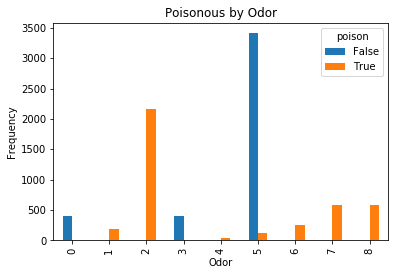

In [134]:
# barplot of poisonous by odor (True or False)
pd.crosstab(result.odor, result.poison.astype(bool)).plot(kind='bar')
plt.title('Poisonous by Odor')
plt.xlabel('Odor')
plt.ylabel('Frequency')

Attribute Information of odor is below:
almond=a (0)
anise=l (3)
creosote=c (1)
fishy=y (8)
foul=f (2)
musty=m (4)
none=n (5)
pungent=p (6)
spicy=s (7)

From the chart above, we can see that odor #5 (no odor) has the highest false value in poison. In other words, there is more chance of not poisonous for the mushrooms with no odor while there's higher chance of being poisonous for the mushrooms with a foul odor (#2).  

Text(0,0.5,'Frequency')

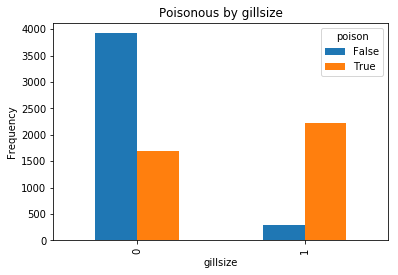

In [135]:
# barplot of poisonous by gillsize (True or False)
pd.crosstab(result.gillsize, result.poison.astype(bool)).plot(kind='bar')
plt.title('Poisonous by gillsize')
plt.xlabel('gillsize')
plt.ylabel('Frequency')

Based on this bar chart, the number 0 means that gill size is broad and the numer 1 means that gill size is narrow. Since the number of true and the number of gill size 1 have strong relationship, we can say that narrow gill size of mushroom has higher chance of having poison. Also, we assume that this is a strong indicator to decide that whether mushroom is poisonous or not.

Text(0,0.5,'Frequency')

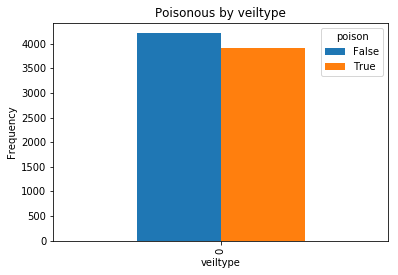

In [136]:
# barplot of poisonous by veiltype (True or False)
pd.crosstab(result.veiltype, result.poison.astype(bool)).plot(kind='bar')
plt.title('Poisonous by veiltype')
plt.xlabel('veiltype')
plt.ylabel('Frequency')

As you see, this data has only partial veil and it cannot determine that the mushroom is poisonous because the number of false and the number of true are similar with 0 of veil type, which is partial veil. 

Text(0,0.5,'Frequency')

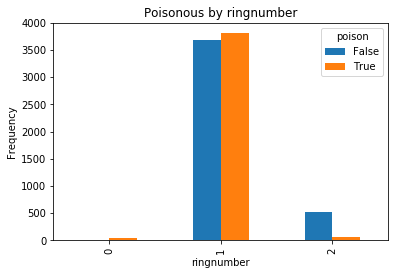

In [137]:
# barplot of poisonous by ringnumber (True or False)
pd.crosstab(result.ringnumber, result.poison.astype(bool)).plot(kind='bar')
plt.title('Poisonous by ringnumber')
plt.xlabel('ringnumber')
plt.ylabel('Frequency')

Based on the above chart, it seems if the ring number is 0, the mushroom is poisonous and if the ring number is 2, the mushroom is edible but it's not helpful for getting meaningful conclusions because they are small populations. Also, the ring number 1 cannot figure out whether the mushroom is poisonous or not.

In [138]:
# how many mushrooms are poisonous in the data set?
result.poison.values.sum()

3916

In [139]:
# what percentage of the data set poisonous?
result.poison.values.sum() / result.shape[0]

0.48202855736090594

Since we know that 48.2% of the mushrooms in the data set poisonous, we could achieve a model accuracy of (1 - .482) = 51.8% by simply predicting "Not poisonous" for each mushrooms. This metric is referred to as the null error rate. 

In [140]:
# define a vector containing the names of the attributes to use
predictors = ['bruises', 'odor', 'gillsize', 'veiltype', 'ringnumber']

# create a subset of the data using only the selected explanatory variables
X_result = result [predictors].values

# isolate the response indicator for the data
y_result  = result['poison'].values

# sanity check on the data
X_result[:5]

array([[1, 6, 1, 0, 1],
       [1, 0, 0, 0, 1],
       [1, 3, 0, 0, 1],
       [1, 6, 1, 0, 1],
       [0, 5, 0, 0, 1]], dtype=int64)

In [141]:
# sanity check on response indicator
y_result[:5]

array([1, 0, 0, 1, 0], dtype=int64)

In [142]:
# Using the LogisticRegression() method for this model
model = LogisticRegression()

# fit the model: X_result contains our explanatory variables while 
# y_result contains the response variable
model.fit(X_result, y_result)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [143]:
# calculate the accuracy of the model relative to the data set
model.score(X_result, y_result)

0.9202363367799113

Recall from above we calculated the null error rate for our data to be 51.8%. The model we've generated has an accuracy score of 92.02%. As such, our model appears to be useful.

In [144]:
# examine the model coefficients for the explanatory variables
print(predictors)
model.coef_

['bruises', 'odor', 'gillsize', 'veiltype', 'ringnumber']


array([[-2.17814495, -0.55713685,  3.91994363,  0.        , -0.76264932]])

From the above we see that:

Bruises: If there's Bruises, less chance to be poisonous

Odor: There is more chance of not poisonous for the mushrooms with no odor

Gillsize: The mushrooms in a size of universal are more likely be poisonous  

Veiltype: No association

Ringnumber: An increase in the value of 'Ringnumber' is associated with a decreased likelihood of poisonousness

Since gillsize has the highest coefficient value, we can conclude that gillsize is the best predictor column that most accurately predicts whether or not a mushroom is poisonous

In [145]:
# generate predictions for the data using our new model
y_predict = model.predict(X_result)
y_predict[:10]

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

## Extra: Try Classifier and Regressor

In [146]:
# read csv file
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data", header=None)

In [147]:
# rename the names of the columns like below
df = df.rename(columns={0:"poison", 1:"cap-shape", 2:"ap-surface", 3:"cap-color", 4:"bruises", 5:"odor", 6:"gill-attachment",
                        7:"gill-spacing", 8:"gill-size", 9:"gill-color", 10:"stalk-shape", 11:"stalk-root", 12:"stalk-surface-above-ring",
                        13:"stalk-surface-below-ring", 14:"stalk-color-above-ring", 15:"stalk-color-below-ring", 16:"veil-type",
                        17:"veil-color", 18:"ring-number", 19:"ring-type", 20:"spore-print-color", 21:"population", 22:"habitat"})

In [148]:
# create a new dataframe called result
column_list = ["cap-shape", "ap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color",
               "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring",
               "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
result = pd.DataFrame(columns=column_list)

In [149]:
# create a set of dummy variables 
df = df.apply(preprocessing.LabelEncoder().fit_transform)

In [150]:
# split the dataframe
dfs = np.split(df, [1], axis=1)

X, y = dfs[1], dfs[0]

In [151]:
# use a ExtraTreesClassifier
# put our data into clf then extract importance, therefore we can find importance of each feature

clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X, y)
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

result.loc['Classifier_importances',:] = importances

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [152]:
importances

array([0.00484161, 0.02003652, 0.01197685, 0.08839895, 0.12860043,
       0.0053743 , 0.07067999, 0.15355639, 0.05449933, 0.04210471,
       0.05154377, 0.05984165, 0.05534032, 0.01313899, 0.01596351,
       0.        , 0.00303436, 0.01537746, 0.08669521, 0.05870811,
       0.03446471, 0.02582284])

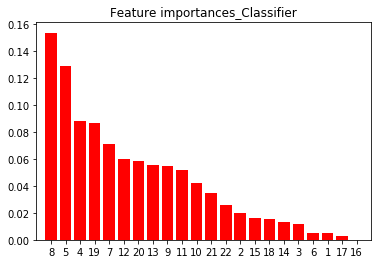

In [153]:
# use a bar graph showing the result
plt.figure()
plt.title("Feature importances_Classifier")
plt.bar(range(X.shape[1]), importances[indices], color='r')
plt.xticks(range(X.shape[1]), indices+1)
plt.xlim([-1, X.shape[1]])
plt.show()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


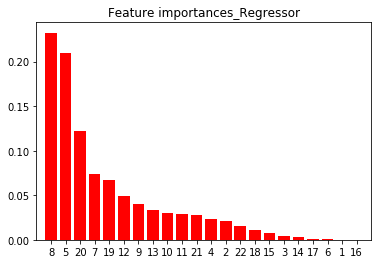

In [154]:
#use an ExtraTreesRegressor this time
clf1 = ExtraTreesRegressor(n_estimators=100)
clf1 = clf1.fit(X, y)
importances = clf1.feature_importances_
indices = np.argsort(importances)[::-1]

result.loc['Regressor_importances',:] = importances

# use a bar graph showing the result
plt.figure()
plt.title("Feature importances_Regressor")
plt.bar(range(X.shape[1]), importances[indices], color='r')
plt.xticks(range(X.shape[1]), indices+1)
plt.xlim([-1, X.shape[1]])
plt.show()

Therefore, we can conclude that gill-size (#8) is the best predictor column that most accurately predicts whether or not a mushroom is poisonous